In [380]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots

# read in the data

df = pd.read_csv(r'/Users/austinsmithers/Desktop/DataPortfolio/Python/USAHousingDataset.csv')


In [382]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [384]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

date - 0.0%
price - 0.0%
bedrooms - 0.0%
bathrooms - 0.0%
sqft_living - 0.0%
sqft_lot - 0.0%
floors - 0.0%
waterfront - 0.0%
view - 0.0%
condition - 0.0%
sqft_above - 0.0%
sqft_basement - 0.0%
yr_built - 0.0%
yr_renovated - 0.0%
street - 0.0%
city - 0.0%
statezip - 0.0%
country - 0.0%


In [386]:
# check data types
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [388]:
# sort values by date and price
df.sort_values(by=['date', 'price'], inplace=False, ascending=True).head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3892,2014-05-02 00:00:00,237227.857143,4.0,2.50,2200,9397,2.0,0,0,3,2200,0,1987,2000,5214 S 292nd St,Auburn,WA 98001,USA
3849,2014-05-02 00:00:00,436110.000000,3.0,2.50,1770,1235,3.0,0,0,3,1600,170,2007,0,1156 N 93rd St,Seattle,WA 98103,USA
3879,2014-05-02 00:00:00,440000.000000,4.0,2.25,2160,8119,1.0,0,0,3,1080,1080,1966,1913,12211 SE 65th St,Bellevue,WA 98006,USA
3894,2014-05-05 00:00:00,0.000000,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
3896,2014-05-05 00:00:00,0.000000,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA


In [418]:
# change price to an integer to remove decimal places
df['price'] = df['price'].astype('int64')

In [390]:
# split up state and zip code
df['state'] = df['statezip'].astype(str).str[:2]
df['zip'] = df['statezip'].astype(str).str[2:]

In [392]:
# look at all of the data
pd.set_option('display.max_rows', None) #no set limit on visible rows

In [394]:
# drop duplicates
newdf = df.groupby(['date', 'price', 'street']).first() 
# drop duplicates on one column: df.['column'].drop.duplicates()sort_values(ascending=True)

In [396]:
# drop country and state columns (all the same values). Will not show up on heat map
df = df.drop(columns=['country', 'state'])

<Axes: xlabel='view', ylabel='price'>

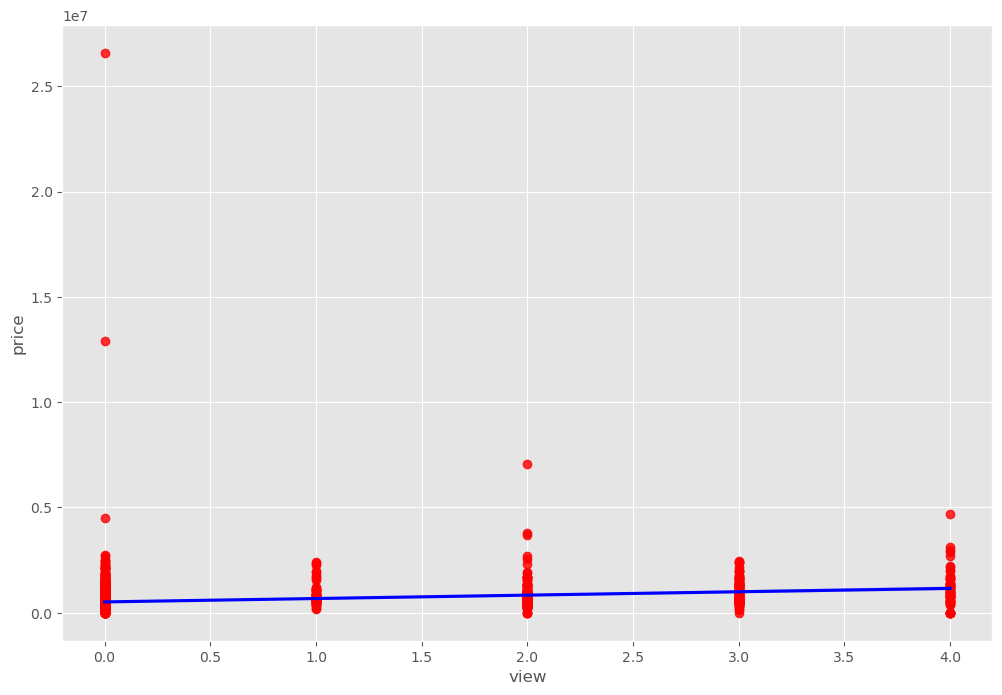

In [439]:
# view corr price
#scatter plot
sns.regplot(x="view", y="price", data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

<Axes: xlabel='bedrooms', ylabel='price'>

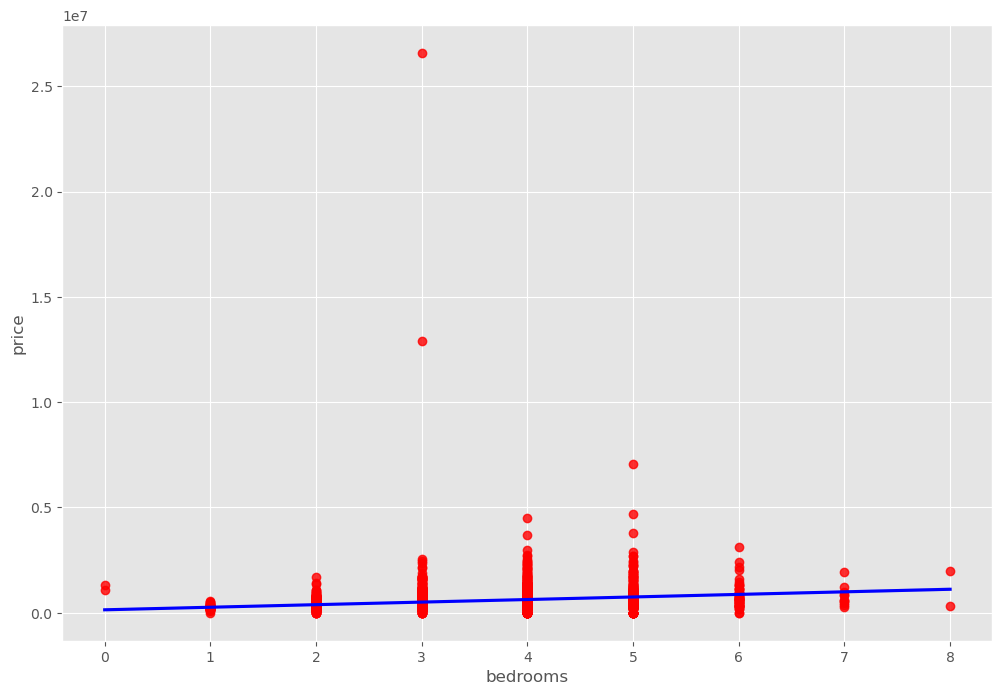

In [432]:
# bedrooms corr price
#scatter plot
sns.regplot(x="bedrooms", y="price", data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

<Axes: xlabel='yr_built', ylabel='sqft_living'>

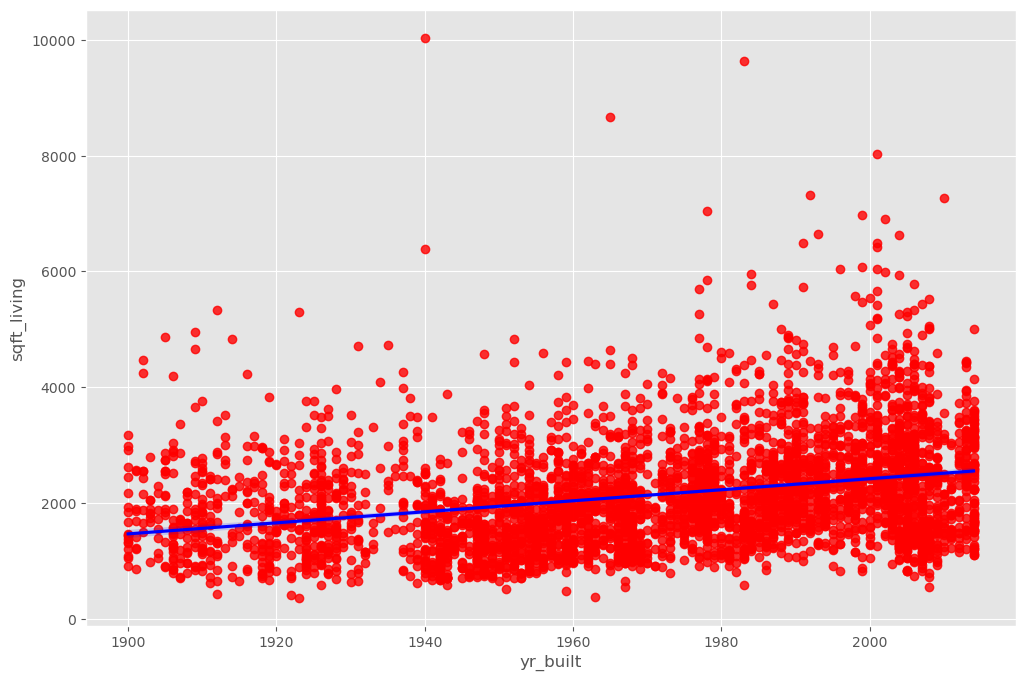

In [434]:
# yr_built corr sqft_living
#scatter plot
sns.regplot(x="yr_built", y="sqft_living", data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

<Axes: xlabel='sqft_living', ylabel='price'>

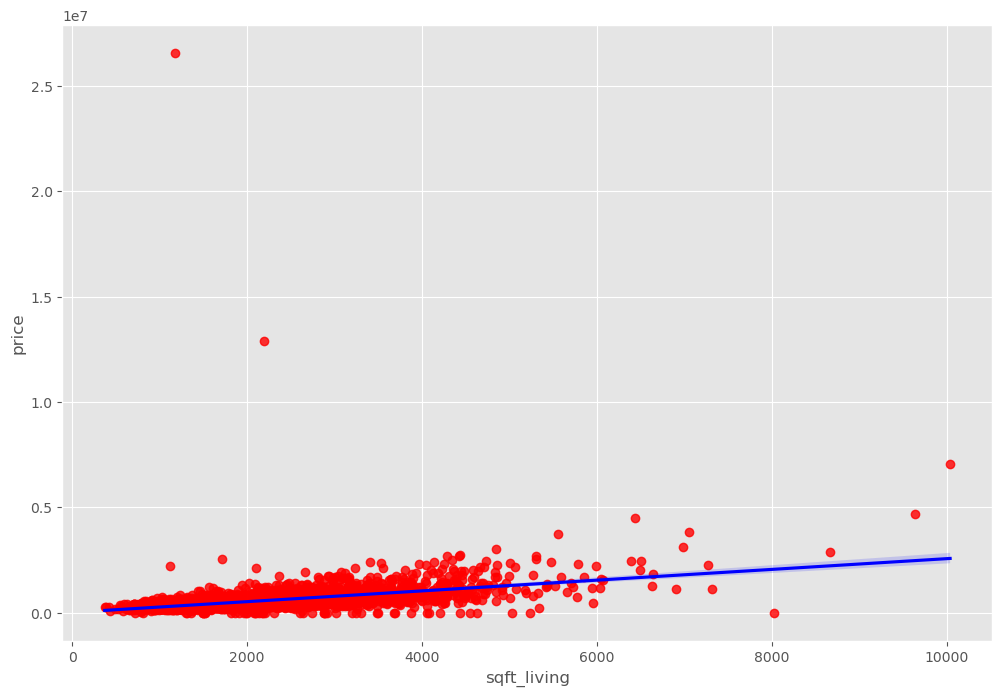

In [400]:
# price corr sqft_living
#scatter plot
sns.regplot(x="sqft_living", y="price", data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

<Axes: xlabel='sqft_living', ylabel='bathrooms'>

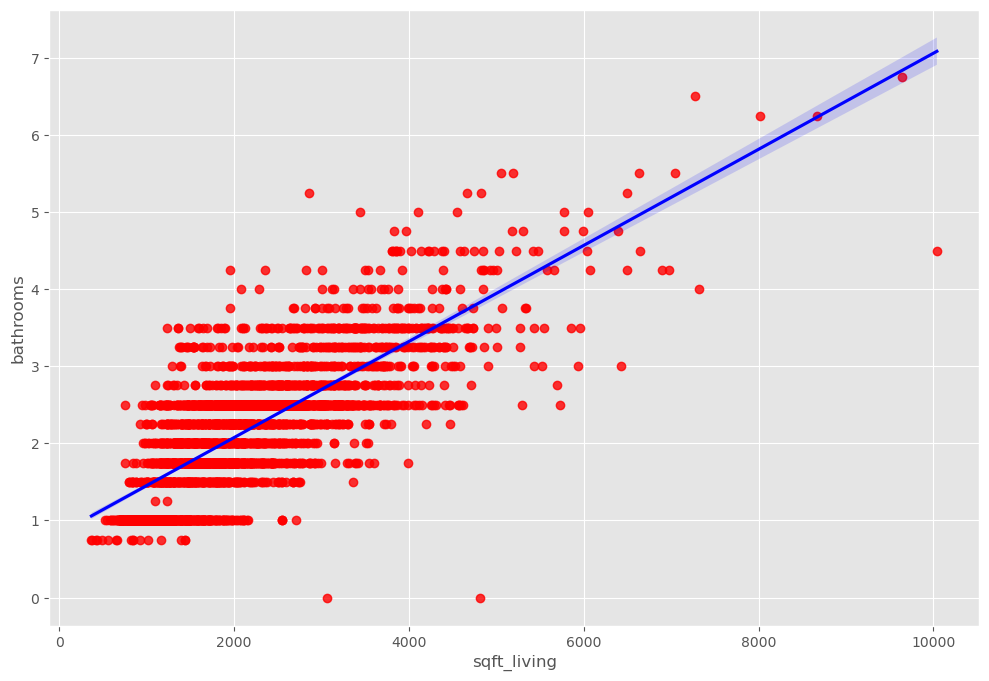

In [402]:
# sqft_living corr bathrooms
#scatter plot
sns.regplot(x="sqft_living", y="bathrooms", data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [404]:
#convert object types to category for heat map
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

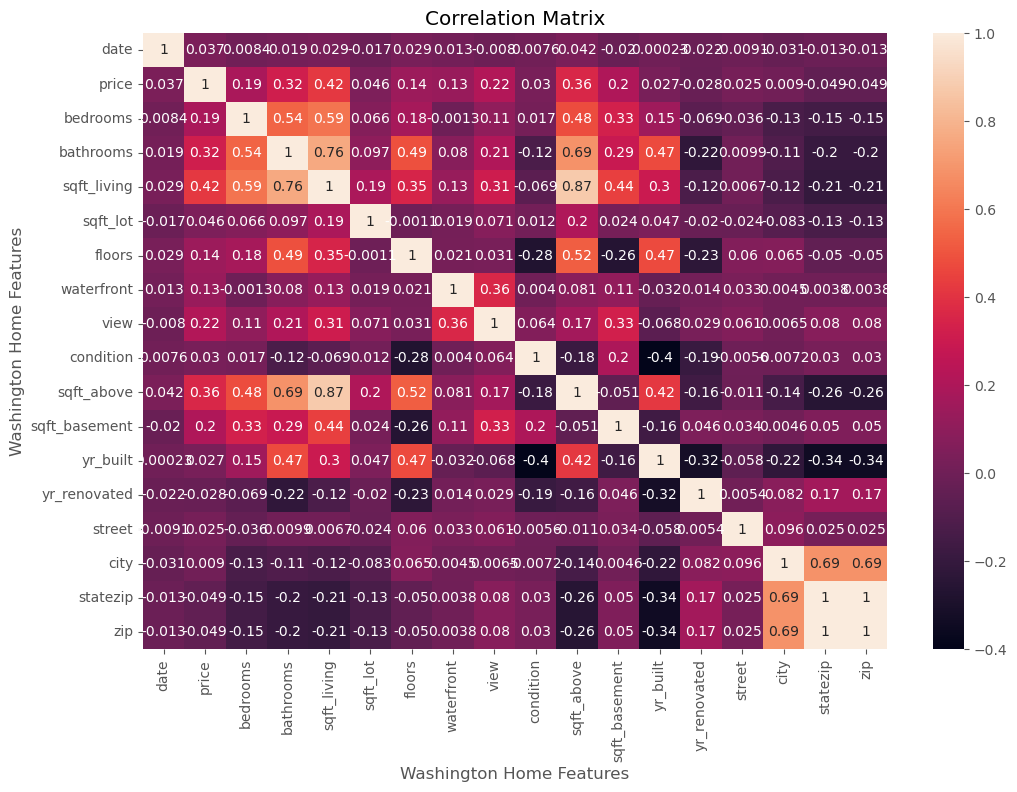

In [420]:
# create heat map
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix")
plt.xlabel("Washington Home Features")
plt.ylabel("Washington Home Features")
plt.show()

In [408]:
# view correlation table
df_numerized.corr()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,zip
date,1.000000,0.037421,0.008354,0.018541,0.028560,-0.017238,0.029377,0.013439,-0.008043,0.007636,0.042336,-0.019644,0.000227,-0.021995,-0.009129,-0.031162,-0.013398,-0.013398
price,0.037421,1.000000,0.188765,0.317785,0.418528,0.045964,0.143180,0.131401,0.217553,0.030327,0.355214,0.204066,0.027067,-0.028272,0.025258,0.008999,-0.048699,-0.048699
bedrooms,0.008354,0.188765,1.000000,0.542549,0.590110,0.065747,0.178908,-0.001286,0.105512,0.016503,0.478124,0.329862,0.153514,-0.069439,-0.036229,-0.129505,-0.153671,-0.153671
bathrooms,0.018541,0.317785,0.542549,1.000000,0.760353,0.097497,0.487462,0.080152,0.210590,-0.123024,0.687679,0.292170,0.470814,-0.221307,0.009857,-0.108254,-0.197877,-0.197877
sqft_living,0.028560,0.418528,0.590110,0.760353,1.000000,0.194226,0.345130,0.126157,0.308098,-0.069315,0.874881,0.439053,0.296545,-0.124646,0.006690,-0.122267,-0.207389,-0.207389
sqft_lot,-0.017238,0.045964,0.065747,0.097497,0.194226,1.000000,-0.001113,0.019229,0.071264,0.012016,0.203190,0.023567,0.047224,-0.020308,-0.024197,-0.083466,-0.127633,-0.127633
floors,0.029377,0.143180,0.178908,0.487462,0.345130,-0.001113,1.000000,0.021278,0.030604,-0.275212,0.524777,-0.261826,0.470139,-0.234445,0.060294,0.064610,-0.049776,-0.049776
waterfront,0.013439,0.131401,-0.001286,0.080152,0.126157,0.019229,0.021278,1.000000,0.359237,0.004027,0.081076,0.109736,-0.031891,0.014030,0.032871,0.004497,0.003792,0.003792
view,-0.008043,0.217553,0.105512,0.210590,0.308098,0.071264,0.030604,0.359237,1.000000,0.064440,0.167270,0.325002,-0.067859,0.028837,0.061226,0.006499,0.080114,0.080114
condition,0.007636,0.030327,0.016503,-0.123024,-0.069315,0.012016,-0.275212,0.004027,0.064440,1.000000,-0.183599,0.197656,-0.400394,-0.187971,-0.005619,-0.007156,0.029815,0.029815


In [410]:
correlation_matrix = df_numerized.corr()
correlation_pairs = correlation_matrix.unstack()
sorted_pairs = correlation_pairs.sort_values()
sorted_pairs.head()
print(sorted_pairs)

condition      yr_built        -0.400394
yr_built       condition       -0.400394
statezip       yr_built        -0.341195
zip            yr_built        -0.341195
yr_built       statezip        -0.341195
               zip             -0.341195
yr_renovated   yr_built        -0.321915
yr_built       yr_renovated    -0.321915
condition      floors          -0.275212
floors         condition       -0.275212
               sqft_basement   -0.261826
sqft_basement  floors          -0.261826
zip            sqft_above      -0.257522
sqft_above     statezip        -0.257522
               zip             -0.257522
statezip       sqft_above      -0.257522
floors         yr_renovated    -0.234445
yr_renovated   floors          -0.234445
bathrooms      yr_renovated    -0.221307
yr_renovated   bathrooms       -0.221307
city           yr_built        -0.220063
yr_built       city            -0.220063
statezip       sqft_living     -0.207389
zip            sqft_living     -0.207389
sqft_living    s

In [322]:
# price has the highest correlation with sqft_living, sqft_above, and bathrooms, but these correlations are still relatively weak. The strongest correlations overall are between sqft_living & sqft_above, and sqft_living & bathrooms.